In [188]:
#IMPORTS
import csv
import collections
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
!pip install plotly
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import random
random.seed(10)
from matplotlib.pyplot import figure
import math
import matplotlib.patches as mpatches

In [3]:
#RAW DATA
raw_data_path = '/Users/zoeweiss/Desktop/Desktop/lab(s)/barnighausen/TZAH2006/TZA.csv'

with open(raw_data_path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

raw_data = data[1:]

In [4]:
#Question numbers from TZAH2006_public_use_codebook.pdf
standard_vairable_names = data[0][:54]

#Question summaries from TZAH2006_public_use_codebook.pdf
questions_all = [['age','sex','grade','height','weight'],
 ['hungry','fruit','vegetables', 'NA'],#Dietary Behaviors
 ['hand_wash_eat','hand_wash_toilet','soap'], #Hygiene
 ['attack','fight','injury','injury_action','injury_cause','injury_reason','injury_id','bully','bully_type'], #Violence and Unintentional Injury
 ['lonely','worry','sad','suicidal','suidice_attempt','close_friends'], #Mental Health
 ['cigarette','cigarette_frequency','other_tobacco','smoking_stop','secondhand_smoke','parent_tobacco'],#Tobacco Use
 ['alcohol','alcohol_amount','alcohol_source','drunk','negative_alcohol'], #Alcohol Use
 ['drugs'],#Drug Use
 ['sex','sex_age','sex_partners','sex_recent','condom_use'], #Sexual Behaviors
 ['physical_activity','physical_activity_length','tv_time','walk_bike_to_school'],# Physical Activity
 ['commute_length','unexcused_school','kind_peers','attentive_parents','understanding_parents','informed_parents']] #Protective Factors

questions_listed = []
for topic in questions_all:
    questions_listed+=topic
    
questions = {}
questions['background'] = questions_all[0]
questions['dietary_behaviors'] = questions_all[1]
questions['hygiene'] = questions_all[2]
questions['violence_and_unintentional_injury'] = questions_all[3]
questions['mental_health'] = questions_all[4]
questions['tobacco_use'] = questions_all[5]
questions['alcohol_use'] = questions_all[6]
questions['drug_use'] = questions_all[7]
questions['sexual_behaviors'] = questions_all[8]
questions['physical_activity'] = questions_all[9]
questions['protective_factors'] = questions_all[10]

In [5]:
#Create a scoring system such that a score is compared to the middle number and if it is more risky, is added. If less risky, subtracted

def calculate_scores(topic, risk_order, scales_max, weights, power):
    #Risk order is inputed so LH = low -> high and HR = high -> low
    track_scores = []
    for participant in range(len(raw_data)):
        scores = 0
        for question in range(len(questions[topic])):
            #If risk increases for higher scores
            if risk_order[question] == 'lh':
                value = raw_data[participant][questions_listed.index(questions[topic][question])]
                if value.isnumeric()==True:
                    #If a score is above the middle score, add the difference
                    if int(value)>scales_max[question]/2:
                        #scores+=(int(value)-scales_max[question]/2)*(weights[question]**power)
                        scores+=scales_max[question]/2*(weights[question]**power)
                    #If a score is below the middle score, subtract the difference
                    if int(value)<=scales_max[question]/2:
                        #scores-=(int(value)-scales_max[question]/2)*(weights[question]**power)
                        scores-=scales_max[question]/2*(weights[question]**power)

            #If risk decreases for higher scores
            if risk_order[question] == 'hl':
                value = raw_data[participant][questions_listed.index(questions[topic][question])]
                if value.isnumeric()==True:
                    #If a score is above the middle score, subtract the difference
                    if int(value)>scales_max[question]/2:
                        #scores-=(int(value)-scales_max[question]/2)*(weights[question]**power)
                        scores-=scales_max[question]/2*(weights[question]**power)
                    #If a score is below the middle score, add the difference
                    if int(value)<=scales_max[question]/2:
                        #scores+=(int(value)-scales_max[question]/2)*(weights[question]**power)
                        scores+=scales_max[question]/2*(weights[question]**power)
        track_scores.append(scores)

    #Plot the distribution of scores
    plt.xlabel(topic+'_score')
    plt.ylabel('frequency')
    min_val = 0
    max_val = 0
    for element in scales_max:
        min_val -=element 
        max_val +=element
    plt.xlim(min_val, max_val)
    plt.hist(track_scores, bins = 15, color = 'k')
    plt.show()
    return track_scores

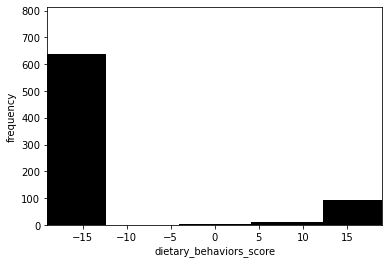

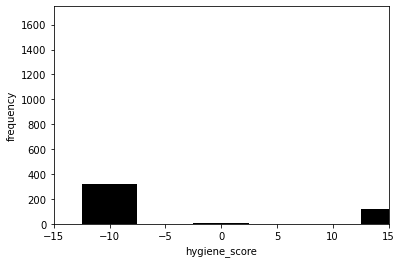

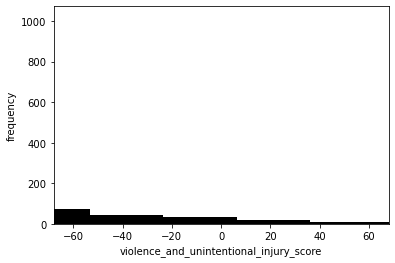

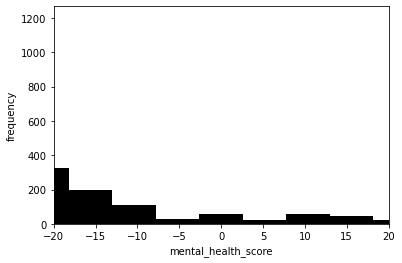

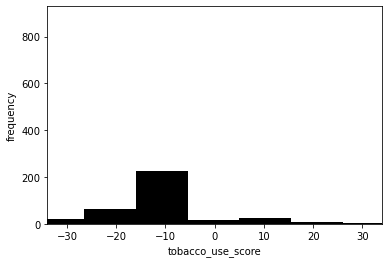

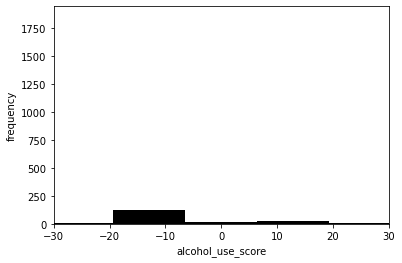

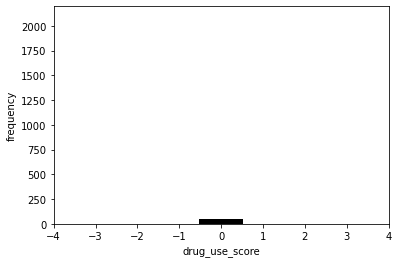

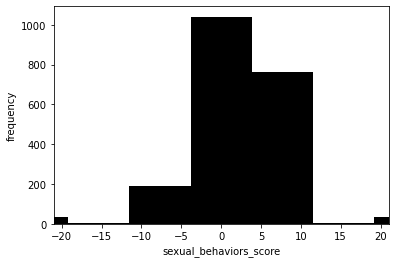

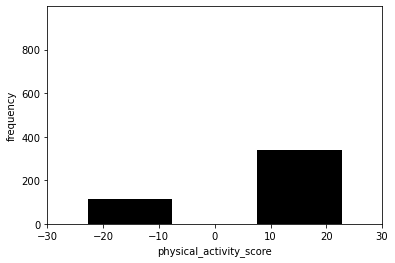

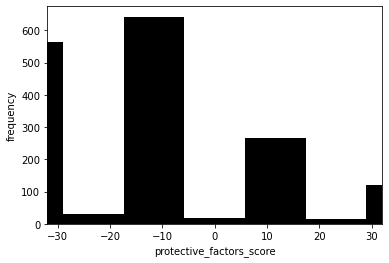

In [6]:
power = 1

#Let's look at Dietary Behaviors risk
topic = 'dietary_behaviors'
#note: there is a blank question for the fourth dietary question
risk_order = ['lh', 'hl', 'hl', 'hl']
scales_max = [5,7,7,0]
weights = scales_max
dietary_behaviors_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Hygiene risk
topic = 'hygiene'
risk_order = ['hl', 'hl', 'hl']
scales_max = [5, 5, 5]
weights = scales_max
hygine_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Violence and Unintentional Injury risk
topic = 'violence_and_unintentional_injury'
risk_order = ['lh', 'lh', 'lh', 'lh', 'lh','lh','lh','lh','lh',]
scales_max = [8, 8, 8, 8, 8, 5, 8, 7, 8]
weights = scales_max
vui_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Mental Health risk
topic = 'mental_health'
risk_order = ['lh', 'lh','hl', 'hl', 'hl','hl']
scales_max = [5, 5, 2, 2, 2, 4]
weights = scales_max
mental_health_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Tobacco Use risk
topic = 'tobacco_use'
risk_order = ['hl', 'lh', 'lh', 'lh', 'lh', 'lh']
scales_max = [6, 7, 7, 4, 5, 5]
weights = scales_max
tobacco_use_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Alcohol Use risk
topic = 'alcohol_use'
risk_order = ['lh', 'lh', 'lh', 'lh', 'lh']
scales_max = [7, 7, 8, 4, 4]
weights = scales_max
alcohol_use_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Drug Use risk
topic = 'drug_use'
risk_order = ['lh']
scales_max = [4]
weights = scales_max
drug_use_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Sexual Behaviors risk
topic = 'sexual_behaviors'
risk_order = ['hl', 'hl', 'lh', 'hl', 'hl']
scales_max = [2,7,7,2,3]
weights = scales_max
sexual_behaviors_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Physical Activity risk
topic = 'physical_activity'
risk_order = ['hl', 'hl', 'lh', 'hl']
scales_max = [8, 8, 6, 8]
weights = scales_max
physical_activity_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

#Let's look at Protective Factors risk
topic = 'protective_factors'
risk_order = ['lh', 'lh', 'hl', 'hl', 'lh', 'hl']
scales_max = [7, 5, 5, 5, 5, 5]
weights = scales_max
protective_factors_scores = calculate_scores(topic, risk_order, scales_max, weights, power)

In [7]:
#Find the correlation coefficient between all scores for each category
all_scores = [mental_health_scores,tobacco_use_scores,alcohol_use_scores,drug_use_scores,sexual_behaviors_scores,physical_activity_scores,protective_factors_scores]
all_scores_titles = ['mental_health_scores','tobacco_use_scores','alcohol_use','drug_use','sexual_behaviors','physical_activity','protective_factors']

all_correlations = []
no_reps = []
for score1 in all_scores:
    for score2 in all_scores:
        if score1!=score2:
            if [score1,score2] not in no_reps:
                no_reps.append([score1,score2])
                no_reps.append([score2,score1])
                all_correlations.append([np.corrcoef(score1, score2)[0][1], all_scores_titles[all_scores.index(score1)], all_scores_titles[all_scores.index(score2)]])

sorted(all_correlations,reverse = True)

[[0.27232862416535314, 'alcohol_use', 'drug_use'],
 [0.20047622955803565, 'tobacco_use_scores', 'alcohol_use'],
 [0.19211154644864303, 'mental_health_scores', 'alcohol_use'],
 [0.19152628289147725, 'tobacco_use_scores', 'drug_use'],
 [0.14835483086227289, 'mental_health_scores', 'tobacco_use_scores'],
 [0.11714198510313731, 'mental_health_scores', 'drug_use'],
 [0.05666571890893234, 'mental_health_scores', 'protective_factors'],
 [0.04902732812078406, 'alcohol_use', 'protective_factors'],
 [0.04887209497354576, 'drug_use', 'protective_factors'],
 [0.04671046440692924, 'alcohol_use', 'sexual_behaviors'],
 [0.036154192368005815, 'alcohol_use', 'physical_activity'],
 [0.020052628293140556, 'tobacco_use_scores', 'protective_factors'],
 [0.019862232891612576, 'sexual_behaviors', 'protective_factors'],
 [0.016506091656070244, 'mental_health_scores', 'physical_activity'],
 [0.01314149609938762, 'physical_activity', 'protective_factors'],
 [0.005218006728271393, 'drug_use', 'physical_activity'

In [8]:
#Make each participant their own list of scores. These are what we will cluster
all_participant_scores = []

for participant in range(len(all_scores[0])):
    participant_score = []
    for score in all_scores:
        participant_score.append(score[participant])
    all_participant_scores.append(participant_score)

colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
  

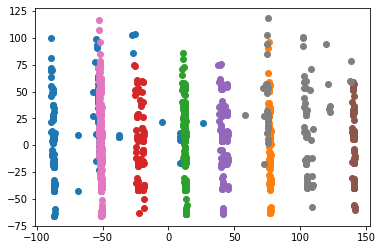

In [251]:
#Gaussian Mixture Model
K = 8

pca = PCA(2)
pca.fit(all_participant_scores)
pca_data = pca.transform(all_participant_scores)
pca_data
X=pca_data
# define the model
model = GaussianMixture(n_components=K)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()


In [253]:
len(all_cluster_scores)

7

<Figure size 432x288 with 0 Axes>

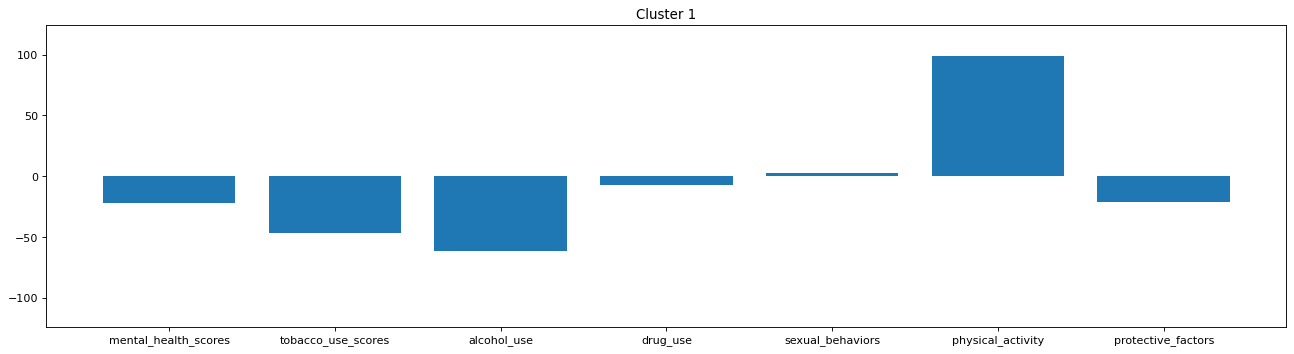

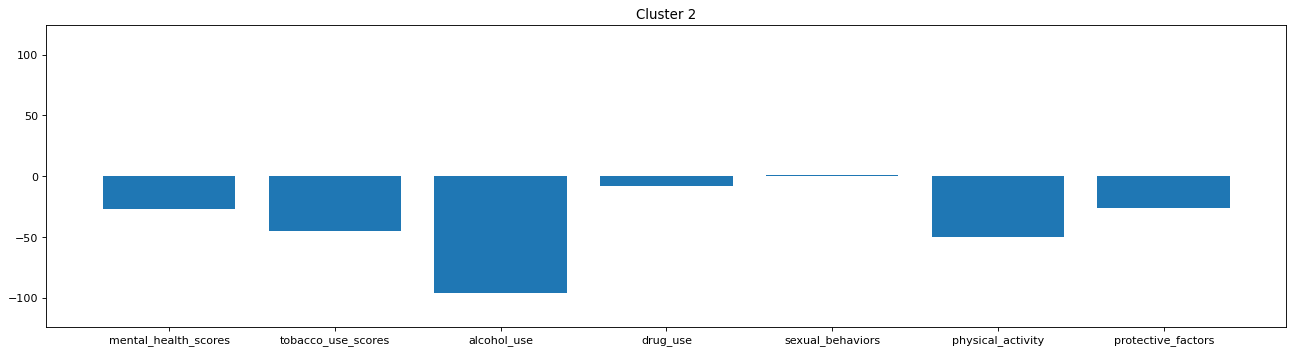

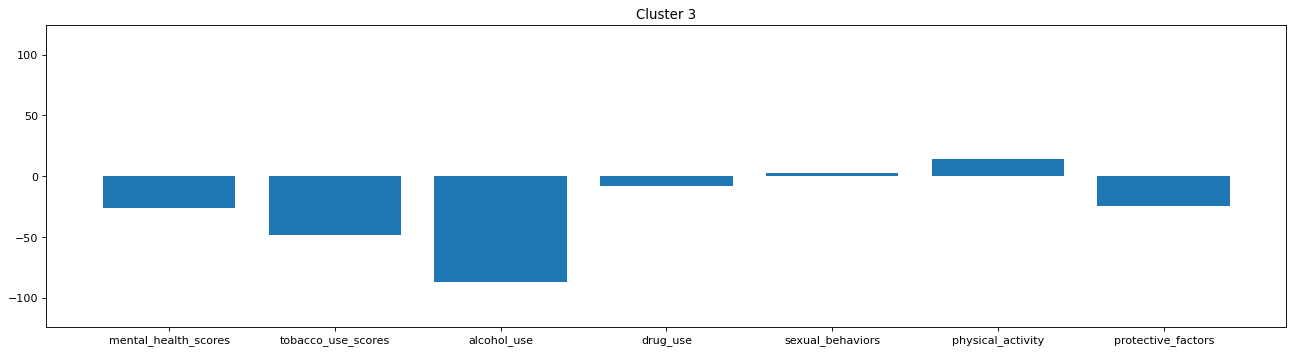

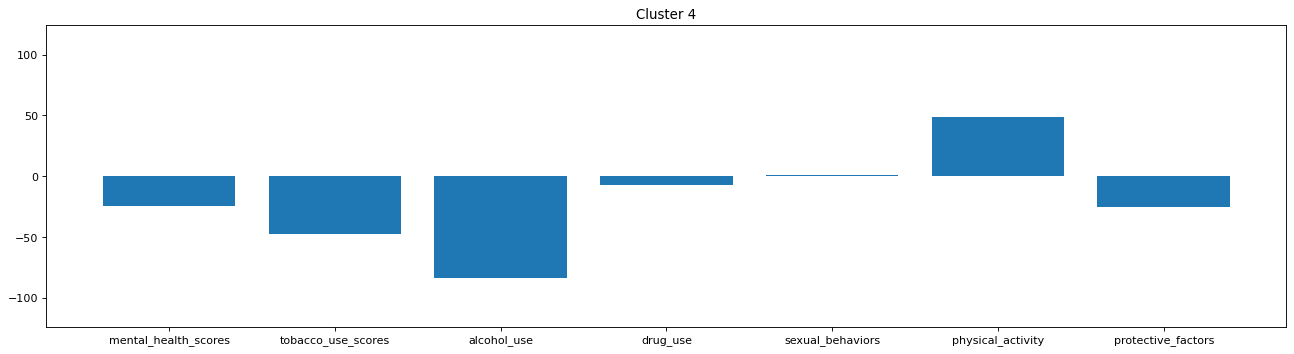

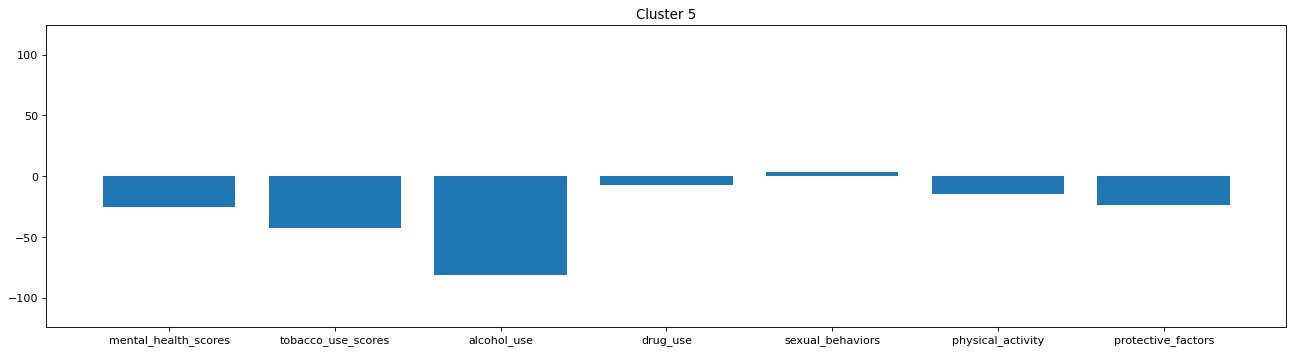

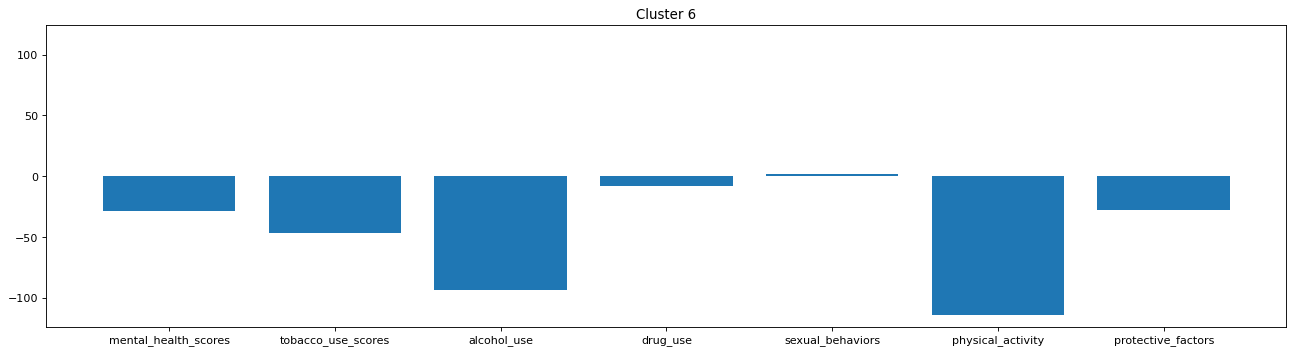

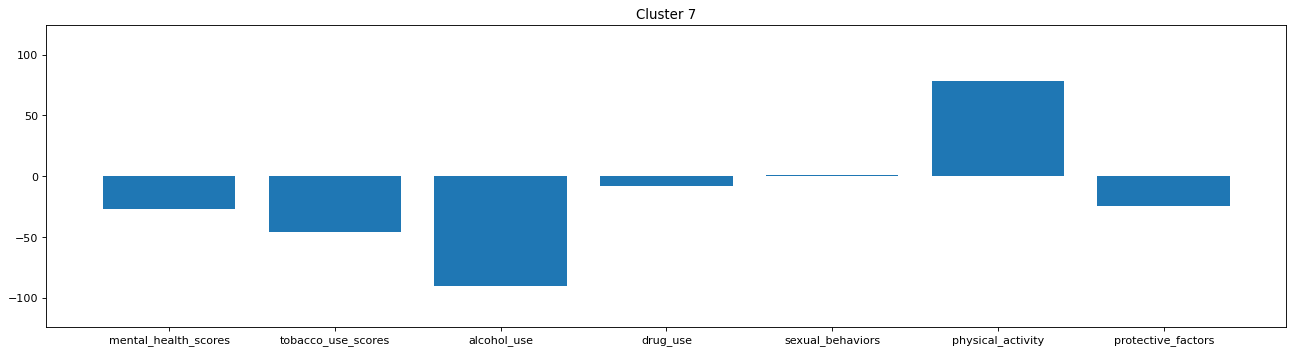

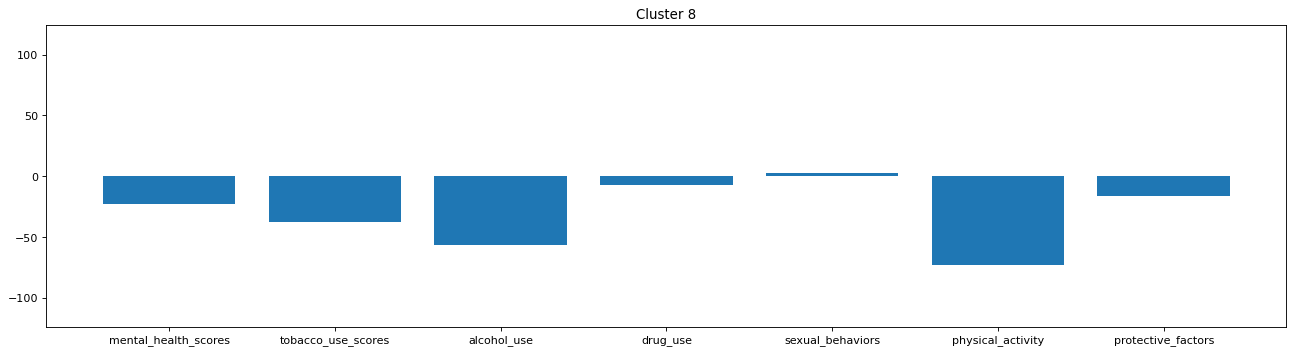

In [254]:
###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID

#First find scores for each individual in a cluster
all_cluster_scores = []
for cluster in range(1+max(yhat)):
    scores_cluster = []
    for participant in range(len(yhat)):
        scores = []
        if yhat[participant]==cluster:
            for score in all_scores:
                scores.append(score[participant])
            scores_cluster.append(scores)
    all_cluster_scores.append(scores_cluster)

#Then find the average for each score in each cluster
fig = plt.figure()

for cluster in range(len(all_cluster_scores)):
    avg_scores = []
    for score_order in range(len(all_cluster_scores[cluster][0])):
        total_scores = []
        for score in all_cluster_scores[cluster]:
            total_scores.append(score[score_order])
        avg_scores.append(np.mean(total_scores))
    figure(figsize=(20, 5), dpi=80)
    plt.bar(all_scores_titles, avg_scores,width = .8)
    plt.title('Cluster '+str(cluster+1))
    min_val = 0
    max_val = 0
    for val in all_scores:
        if min(val)<min_val:
            min_val = min(val)
        if max(val)>max_val:
            max_val = max(val)
    plt.ylim(min_val-10, max_val+10)
    plt.show()

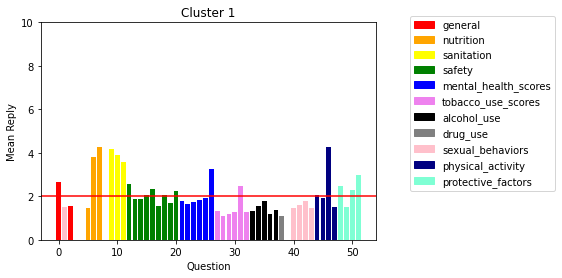

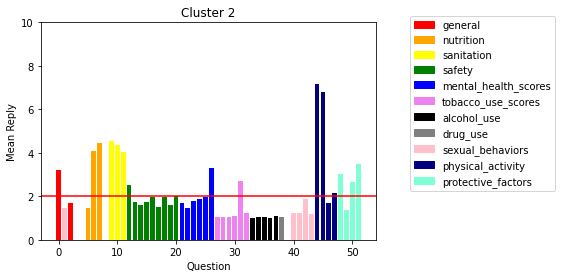

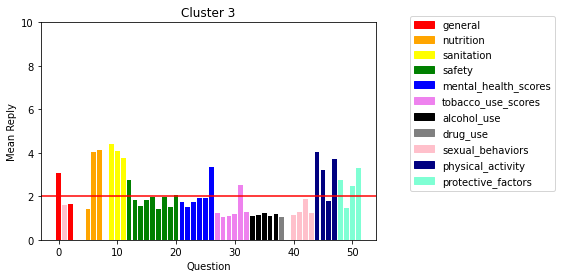

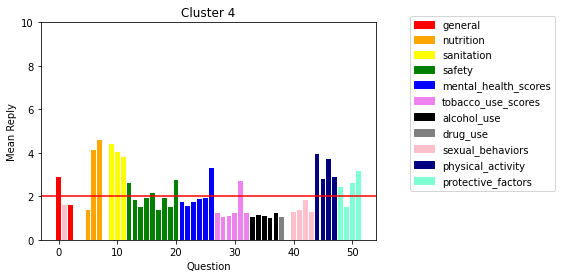

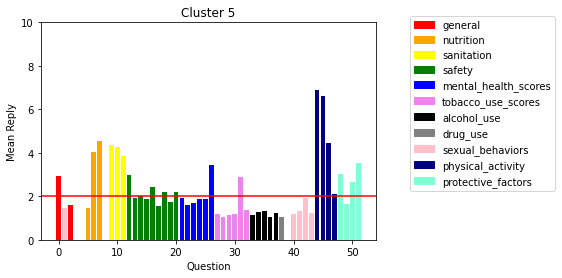

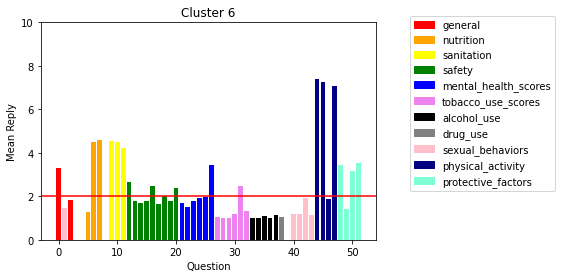

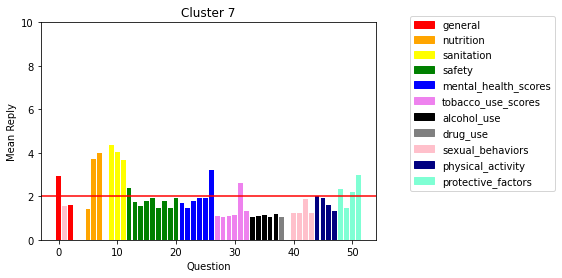

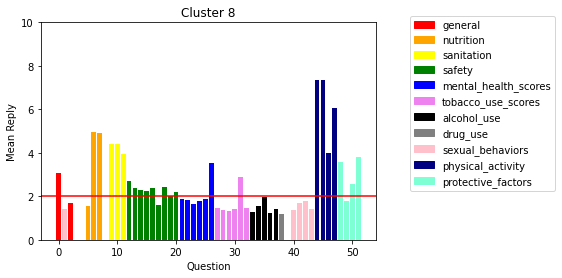

In [256]:
###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID

#First find raw values for each individual in a cluster

for cluster in range(1+max(yhat)):
    raw_values_participants = []
    for participant in range(len(yhat)):
        if yhat[participant]==cluster:
            raw_values_participants.append(raw_data[participant][:54])

    #Find mean scores
    raw_means = []
    for question in range(len(raw_values_participants[0])):
        raw_totals = []
        for response in raw_values_participants:
            if response[question].isnumeric()==True:
                raw_totals.append(int(response[question]))
        raw_means.append(np.mean(raw_totals))
    raw_means = [0 if math.isnan(x) else x for x in raw_means]

    colors = len(questions_listed)*['white']
    cols = ['red', 'orange','yellow','green','blue','violet','black','grey', 'pink', 'navy', 'aquamarine', 'skyblue']

    for options in range(len(questions_all)):
        categories = []
        for cat in questions_listed:
            if cat in questions_all[options]:
                categories.append(questions_listed.index(cat))
        for element in categories:
            colors[element] = cols[options]
    
    plot = raw_means[:-2]
    plt.bar(range(len(plot)), plot,width = .8, color = colors[:len(plot)])
    plt.xlabel('Question')
    plt.ylabel('Mean Reply')
    plt.title('Cluster '+str(cluster+1))
    plt.ylim(0,10)
    plt.axhline(y=2, color='r', linestyle='-')
    all_categories = ['general', 'nutrition', 'sanitation','safety']+all_scores_titles
    patches = []
    for cat in all_categories:
        patches.append(mpatches.Patch(color=cols[all_categories.index(cat)], label=cat))

    plt.legend(handles=patches, bbox_to_anchor=(1.55, 1.05))
    plt.show()

In [244]:
len(plot),len(colors), len(questions_listed)

(52, 54, 54)

In [260]:
#KMeans Clustering
k = 8
kmeans = KMeans(k)
kmeans.fit(all_participant_scores)
kmeans_identified_clusters = kmeans.fit_predict(all_participant_scores)

colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r',
 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight',
 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
  
    
kmeans_colors_use = []
for element in range(len(kmeans_identified_clusters)):
    kmeans_colors_use.append(colors[kmeans_identified_clusters[element]])
    
#Plot PCA
pca = PCA()
components = pca.fit_transform(pd.DataFrame(all_participant_scores))
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color = kmeans_colors_use
)
fig.update_traces(diagonal_visible=False)
fig.show()